# 05 Evaluation


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import logging
import pandas as pd

# Import lightgbm first to avoid issues with pytorch and segfault
from lightgbm import LGBMRanker

sys.path.append("..")

from src.utils.core_utils import setup_logging


# Initialize logging
file_log = "evaluation.log"
root_logger = setup_logging(level=logging.DEBUG, log_file=file_log, remove_existing=True)

2025-06-05 13:43:31,782 - src.utils.core_utils - INFO - Creating file handler with level: 10
2025-06-05 13:43:31,783 - src.utils.core_utils - DEBUG - Logging setup complete to evaluation.log


In [3]:
from src.eval import RankerEvaluatorPipeline, RankerEvaluatorConfig

2025-06-05 13:43:31,864 - matplotlib - DEBUG - CACHEDIR=/Users/sharonshiao/.matplotlib
2025-06-05 13:43:31,870 - matplotlib.font_manager - DEBUG - Using fontManager instance from /Users/sharonshiao/.matplotlib/fontlist-v390.json
/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Pipeline


In [4]:
evaluator_config = RankerEvaluatorConfig.get_default_config()

In [5]:
evaluator_pipeline = RankerEvaluatorPipeline(evaluator_config)

In [6]:
evaluator_pipeline.setup()

2025-06-05 13:43:39,839 - src.eval - INFO - Setting up ranker evaluator pipeline
2025-06-05 13:43:39,839 - src.eval - DEBUG - Config: {
  "sample": [
    "valid",
    "test"
  ],
  "subsample": 0.25,
  "seed": 42,
  "config_evaluator": {
    "k": 12,
    "heuristic_strategy": "rolling_popular_items"
  },
  "experiment_name": "fashion_recommendation",
  "run_id": "afe1c7386b374e3d9b11588803db5ee0"
}
2025-06-05 13:43:39,840 - src.eval - INFO - Evaluator setup complete


2025-06-05 13:43:39,862 - src.eval - INFO - Running ranker evaluator pipeline
2025-06-05 13:43:39,863 - src.eval - INFO - Loading ranker model
2025-06-05 13:43:40,042 - src.eval - INFO - Loading data: ['valid', 'test']
2025-06-05 13:43:40,679 - src.input_preprocessing - INFO - Metadata loaded: {'has_label': False, 'has_group': True, 'use_type': 'inference', 'sample': 'valid', 'has_default_prediction': True}
2025-06-05 13:43:40,681 - src.input_preprocessing - INFO - Loaded group from ../data/model/input_inference/valid/subsample_0.25_42/group.npy
2025-06-05 13:43:40,682 - src.input_preprocessing - INFO - Loaded default prediction from ../data/model/input_inference/valid/subsample_0.25_42/default_prediction.npy
2025-06-05 13:43:40,683 - src.feature_extraction - INFO - Loading optimized raw data from candidates_to_articles_mapping valid 0.25 42
2025-06-05 13:43:40,684 - src.feature_extraction - DEBUG - Loading data from ../data/candidates_to_articles_mapping_valid_sample_0.25_42.json
2025

                       feature  importance
15                 postal_code    0.848023
5                department_no    0.075622
2            colour_group_code    0.027335
0              product_type_no    0.020728
1      graphical_appearance_no    0.012463
10                         age    0.008385
4   perceived_colour_master_id    0.004434
8                   section_no    0.001691
3    perceived_colour_value_id    0.000540
9             garment_group_no    0.000378
11          club_member_status    0.000304
12      fashion_news_frequency    0.000098
6                   index_code    0.000000
7               index_group_no    0.000000
13                          fn    0.000000
14                      active    0.000000


2025-06-05 13:43:43,709 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/AssetsV2/com_apple_MobileAsset_Font7/28f00a24ba19995bab7249993e6e35d11011074a.asset/AssetData/Kai.ttf', name='Kai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-05 13:43:43,710 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansMultani-Regular.ttf', name='Noto Sans Multani', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-05 13:43:43,711 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Kohinoor.ttc', name='Kohinoor Devanagari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-05 13:43:43,712 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansYi-Regular.ttf', name='Noto

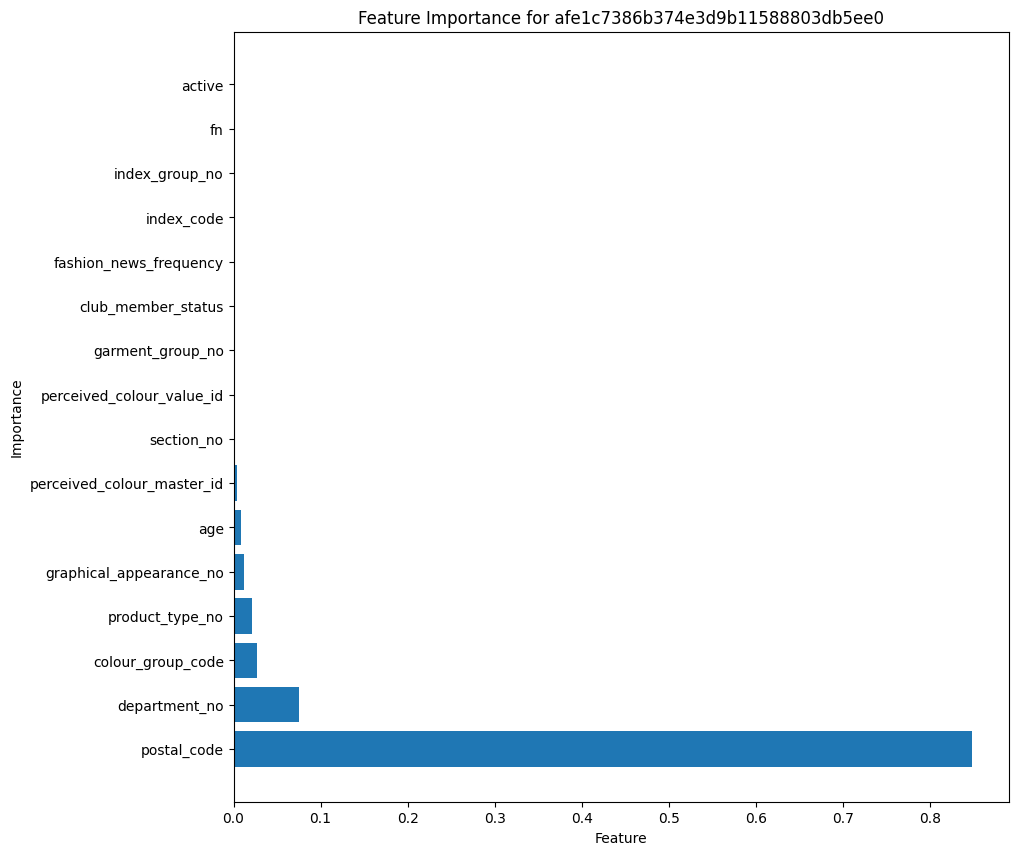

In [7]:
results = evaluator_pipeline.run()

In [8]:
print(evaluator_pipeline.run_id)
display(pd.DataFrame(results))

afe1c7386b374e3d9b11588803db5ee0


,valid,test
mapk_model,0.007874,0.008944
mapk_heuristic,0.005664,0.008879
mapk_ideal,0.026966,0.034870


In [9]:
evaluator_pipeline.ranker.model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.9421778130189737,
 'importance_type': 'gain',
 'learning_rate': 0.18985390598482632,
 'max_depth': -1,
 'min_child_samples': 86,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 307,
 'n_jobs': None,
 'num_leaves': 264,
 'objective': 'lambdarank',
 'random_state': 111,
 'reg_alpha': 59.42500712174797,
 'reg_lambda': 98.56539859375346,
 'subsample': 0.9522696808025917,
 'subsample_for_bin': 200000,
 'subsample_freq': 1,
 'metrics': 'ndcg',
 'feature_pre_filter': True,
 'verbosity': -1}